In [1]:
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

import pandas as pd
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

from ast import literal_eval
for col in ['job_skills', 'job_type_skills']:
    df[col] = df[col].apply(lambda x : literal_eval(x) if pd.notna(x) else x)

df_da_india = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()

In [2]:
df_da_india = df_da_india.dropna(subset = 'salary_year_avg')

In [3]:
df_da_india_explode = df_da_india.explode('job_skills')

In [4]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_da_india_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_da_india)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
...,...,...,...
postgresql,1,165000.0,1.063830
ms access,1,64600.0,1.063830
mysql,1,165000.0,1.063830


In [5]:
skill_limit = 10 # It's a percentage limit from which we are considering it in a high demand

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


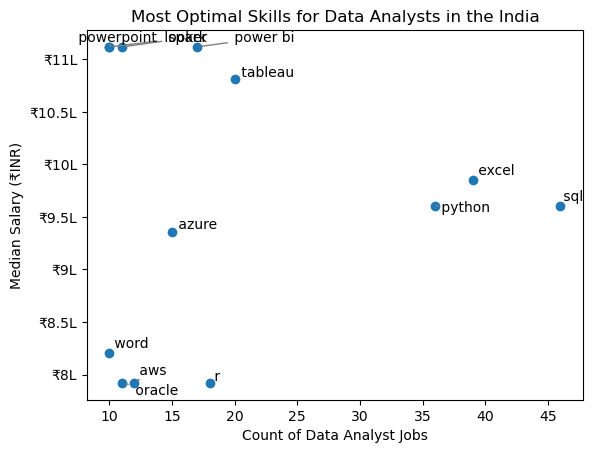

In [6]:
import matplotlib.pyplot as plt

from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_count'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Count of Data Analyst Jobs')
plt.ylabel('Median Salary (₹INR)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the India')

# Custom formatter:
from matplotlib.ticker import FuncFormatter 
# show decimal ONLY if it is not .0 (e.g. 8.5L → yes, 9L → no)
def lakhs_formatter(y, pos):
    value = y / 10000
    if value.is_integer():
        return f'₹{int(value)}L'
    else:
        return f'₹{value:.1f}L'

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lakhs_formatter))

# Previous version    
# # Get current axes, set limits, and format axes
# ax = plt.gca()
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'₹{(y/10000):.1f}L'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(
        plt.text(
            df_DA_skills_high_demand['skill_count'].iloc[i],
            df_DA_skills_high_demand['median_salary'].iloc[i],
            " " + txt,
        )
        )


# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

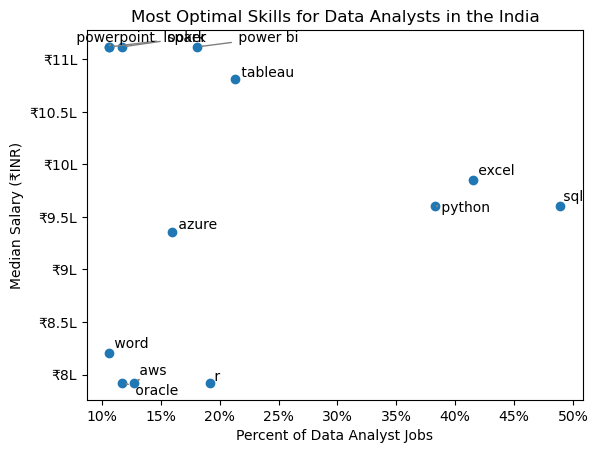

In [7]:
import matplotlib.pyplot as plt

from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary (₹INR)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the India')

# Custom formatter:
from matplotlib.ticker import FuncFormatter 
# show decimal ONLY if it is not .0 (e.g. 8.5L → yes, 9L → no)
def lakhs_formatter(y, pos):
    value = y / 10000
    if value.is_integer():
        return f'₹{int(value)}L'
    else:
        return f'₹{value:.1f}L'

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lakhs_formatter))
# Apply the currency formatter
ticks_x = plt.FuncFormatter(lambda y, pos: f'{int(y)}%')
ax.xaxis.set_major_formatter(ticks_x)

# Previous version    
# # Get current axes, set limits, and format axes
# ax = plt.gca()
# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'₹{(y/10000):.1f}L'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(
        plt.text(
            df_DA_skills_high_demand['skill_percent'].iloc[i],
            df_DA_skills_high_demand['median_salary'].iloc[i],
            " " + txt,
        )
        )


# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()